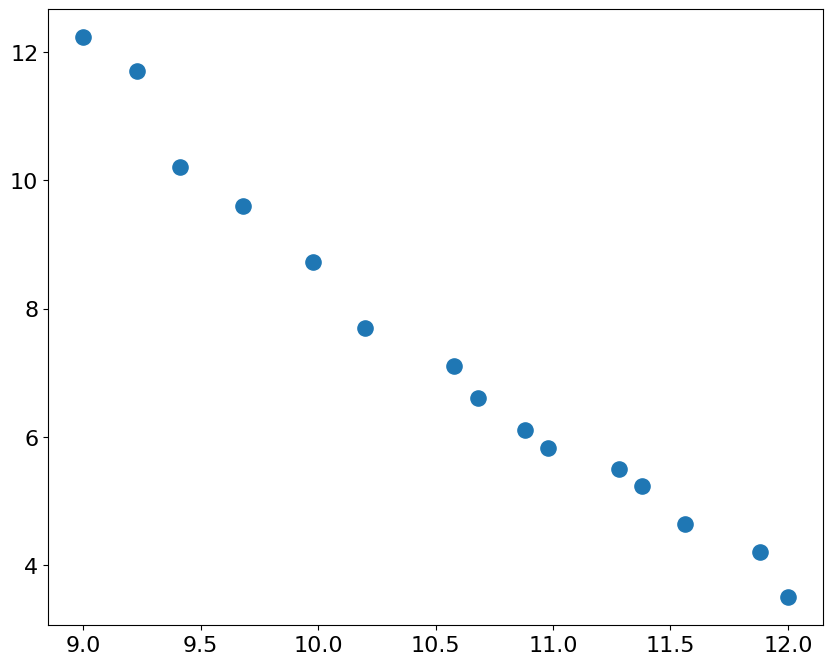

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([9, 9.23, 9.41, 9.68, 9.98, 10.20, 10.58, 10.68, 10.88, 10.98, 11.28, 11.38, 11.56, 11.88, 12.00])
y = np.array([12.23, 11.7, 10.21, 9.60, 8.72, 7.70, 7.10, 6.61, 6.10, 5.82, 5.50, 5.23, 4.65, 4.20, 3.50])

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [2]:
x_mean = np.mean(x)
y_mean = np.mean(y)

num = 0.0
d = 0.0

for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2
    
a = num / d
b = y_mean - a * x_mean

print(f'a = {a}, b = {b}')

a = -2.7695331843340414, b = 36.5633538011666


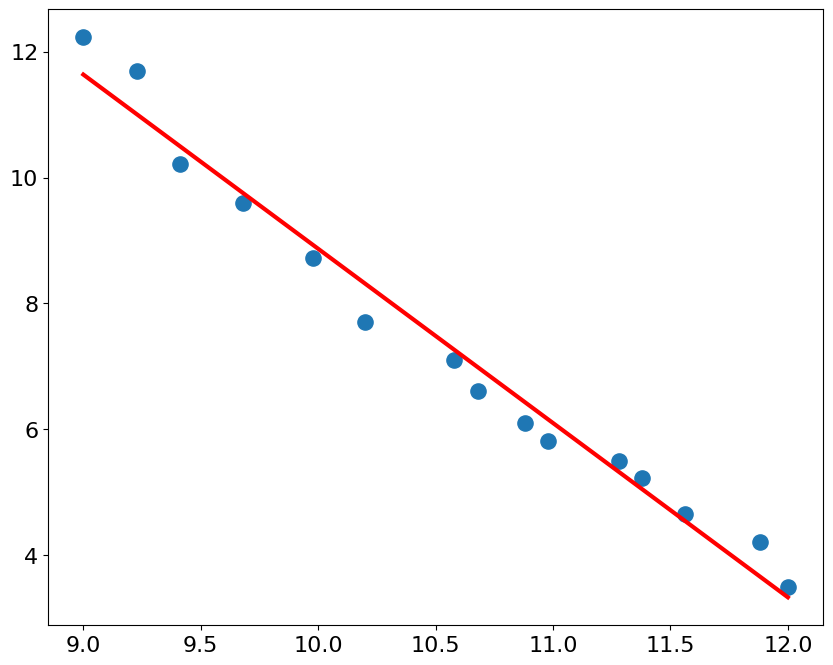

In [3]:
y_hat = a * x + b

plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=120)
plt.plot(x, y_hat, color='r', linewidth=3)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [4]:
x_predict = 8
y_predict = a * x_predict + b
print(y_predict)

14.407088326494268


In [5]:
class SimpleLinearRegression:
    def __init__(self):
        self.a_ = None
        self.b_ = None
        
    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, 'Simple Linear Regression can only solve single feature training data.'
        assert len(x_train) == len(y_train), 'The size of x_train must be equal to the size of y_train.'
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        num = 0.0
        d = 0.0
        
        for x_i, y_i in zip(x_train, y_train):
            num += (x_i - x_mean) * (y_i - y_mean)
            d += (x_i - x_mean) ** 2
        
        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean
        
        return self
    
    def predict(self, x_predict):
        assert x_predict.ndim == 1, 'Simple Linear Regression can only solve single feature training data.'
        assert self.a_ is not None and self.b_ is not None, 'Must fit before predict.'
        
        return np.array([self._predict(x) for x in x_predict])
    
    def _predict(self, x_single):
        return self.a_ * x_single + self.b_

In [6]:
reg = SimpleLinearRegression()
reg.fit(x, y)
print(f'a = {reg.a_}, b = {reg.b_}')
print(reg.predict(np.array([x_predict])))

a = -2.7695331843340414, b = 36.5633538011666
[14.40708833]


In [11]:
class SimpleLinearRegressionPro:
    def __init__(self):
        self.a_ = None
        self.b_ = None
        
    def fit(self, x_train, y_train):
        assert x_train.ndim == 1, 'Simple Linear Regression can only solve single feature training data.'
        assert len(x_train) == len(y_train), 'The size of x_train must be equal to the size of y_train.'
        
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        num = (x_train - x_mean).dot(y_train - y_mean)
        d = (x_train - x_mean).dot(x_train - x_mean)
        
        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean
        
        return self
    
    def predict(self, x_predict):
        assert x_predict.ndim == 1, 'Simple Linear Regression can only solve single feature training data.'
        assert self.a_ is not None and self.b_ is not None, 'Must fit before predict.'
        
        return np.array([self._predict(x) for x in x_predict])
    
    def _predict(self, x_single):
        return self.a_ * x_single + self.b_
    
    
reg_pro = SimpleLinearRegressionPro()
reg_pro.fit(x, y)
print(f'a = {reg_pro.a_}, b = {reg_pro.b_}')

a = -2.7695331843340405, b = 36.56335380116659


In [13]:
m = 100000
big_x = np.random.random(size=m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)
%time reg.fit(big_x, big_y)
%time reg_pro.fit(big_x, big_y)

CPU times: user 21.4 ms, sys: 83 μs, total: 21.5 ms
Wall time: 21.6 ms
CPU times: user 458 μs, sys: 127 μs, total: 585 μs
Wall time: 581 μs


/var/folders/42/qncqfxk938x7pmct3fwy8zmh0000gn/T/ipykernel_30159/3341080867.py:13: RuntimeWarning: divide by zero encountered in dot
  num = (x_train - x_mean).dot(y_train - y_mean)
/var/folders/42/qncqfxk938x7pmct3fwy8zmh0000gn/T/ipykernel_30159/3341080867.py:13: RuntimeWarning: overflow encountered in dot
  num = (x_train - x_mean).dot(y_train - y_mean)
/var/folders/42/qncqfxk938x7pmct3fwy8zmh0000gn/T/ipykernel_30159/3341080867.py:13: RuntimeWarning: invalid value encountered in dot
  num = (x_train - x_mean).dot(y_train - y_mean)
/var/folders/42/qncqfxk938x7pmct3fwy8zmh0000gn/T/ipykernel_30159/3341080867.py:14: RuntimeWarning: divide by zero encountered in dot
  d = (x_train - x_mean).dot(x_train - x_mean)
/var/folders/42/qncqfxk938x7pmct3fwy8zmh0000gn/T/ipykernel_30159/3341080867.py:14: RuntimeWarning: overflow encountered in dot
  d = (x_train - x_mean).dot(x_train - x_mean)
/var/folders/42/qncqfxk938x7pmct3fwy8zmh0000gn/T/ipykernel_30159/3341080867.py:14: RuntimeWarning: invalid 

In [14]:
print(f'a = {reg.a_}, b = {reg.b_}')
print(f'a = {reg_pro.a_}, b = {reg_pro.b_}')

a = 1.9916863693306648, b = 3.005501791840779
a = 1.9916863693306819, b = 3.0055017918407705


In [15]:
from sklearn import datasets
diabetes = datasets.load_diabetes(scaled=False)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [16]:
x = diabetes.data
y = diabetes.target

print(x[:5])
print(y[:5])

[[ 59.       2.      32.1    101.     157.      93.2     38.       4.
    4.8598  87.    ]
 [ 48.       1.      21.6     87.     183.     103.2     70.       3.
    3.8918  69.    ]
 [ 72.       2.      30.5     93.     156.      93.6     41.       4.
    4.6728  85.    ]
 [ 24.       1.      25.3     84.     198.     131.4     40.       5.
    4.8903  89.    ]
 [ 50.       1.      23.     101.     192.     125.4     52.       4.
    4.2905  80.    ]]
[151.  75. 141. 206. 135.]


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(353, 10)
(89, 10)


In [20]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-341.3782363335057
[  0.13768782 -23.06446772   5.84636265   1.19709252  -1.28168474
   0.81115203   0.60165319  10.15953917  67.1089624    0.20159907]


In [19]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

y_predict = lin_reg.predict(x_test)
mse = mean_squared_error(y_test, y_predict)
print(mse)
rmse = root_mean_squared_error(y_test, y_predict)
print(rmse)
mae = mean_absolute_error(y_test, y_predict)
print(mae)

2900.1936284934786
53.8534458367659
42.79409467959992


In [21]:
print(1 - mean_squared_error(y_test, y_predict) / np.var(y_test))

0.45260276297192004


In [24]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_predict))
print(lin_reg.score(x_test, y_test))

0.45260276297192004
0.45260276297192004


In [25]:
lin_reg.fit(x, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

-334.5671385187883
[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]


In [27]:
index = np.argsort(lin_reg.coef_)
names = np.array(diabetes.feature_names)

print(index)
print(names[np.argsort(index)])

[1 4 0 9 6 5 3 2 7 8]
['bmi' 'age' 's4' 's3' 'sex' 's2' 's1' 's5' 's6' 'bp']
